# Testing clustering models for railway track classification

We first start by reading data describing the characteristics of the track and traffic loads.

In [17]:
import pandas as pd
import os

# Get the current working directory
current_directory = os.getcwd()

# Replace 'your_file.csv' with the path to your CSV file
file_path_BIS = os.path.join(current_directory, 'data', 'BIS.csv')
file_path_curve = os.path.join(current_directory, 'data', 'cirkulärkurva_201701.csv')

# Read the CSV file
# Define a function to replace commas with dots
def replace_comma_with_dot(x):
    return x.replace(',', '.')
df_BIS = pd.read_csv(file_path_BIS, sep=';', low_memory=False, converters={'column_name': replace_comma_with_dot})
df_curve = pd.read_csv(file_path_curve, sep=';', low_memory=False, converters={'column_name': replace_comma_with_dot})

In [18]:
# # Take a random sample of 1000 rows from each DataFrame
# df_BIS = df_BIS.sample(n=1000, random_state=1)
# df_curve = df_curve.sample(n=1000, random_state=1)

Exploring the dataframe for track characteristics (BIS).

In [19]:
print(df_BIS.columns)
df_BIS.sample(7).T

Index(['Linje/Pl', 'bdl', 'Index 1', 'Km+m', 'Km+m_ti', 'Ballast',
       'Befästning', 'Sliper', 'Räl', 'Spm', 'Objnr', 'Objnr.1', 'Objnr 1',
       'Räl v', 'Räl h', 'Ballastmodell', 'Tjocklek(cm från suk)',
       'Inl/reningsår', 'Befästningsmodell', 'Klämma', 'Isolator',
       'Mellanlägg', 'Slipermodell', 'Avstånd mm', 'Inläggningsår',
       'Tillverkningsår', 'Slipermatta', 'sida (h,v,b)', 'Rälmodell',
       'Vikt(kg/m)', 'Skarvtyp', 'Inläggningsår.1', 'Tillverkningsår.1',
       'Tillverkare', 'sida (h,v,b).1', 'Rälmodell.1', 'Vikt(kg/m).1',
       'Skarvtyp.1', 'Inläggningsår.2', 'Tillverkningsår.2', 'Tillverkare.1',
       'Ballasttyp', 'Befästningstyp', 'Sliperstyp', 'Rältyp', 'Spårkategori',
       'Spårkategori 1', 'Trolig ålder Ballast', 'Trolig ålder befästning',
       'Trolig ålder sliper', 'Trolig ålder räl', 'Trolig ålder  spårsystem',
       'Hsp', 'Trafikverket infrastrukturägare', 'Underhållsdistrikt',
       'UH.kontraktsområde Bas', 'Status järnvägsnät', 'Fun

,10994,45347,22174,70005,63042,55052,12633
Linje/Pl,Ös,P,Ks-Skog,Tli-Y,Hm,Lkn,Lsb
bdl,222,601,395,969,908,811,236
Index 1,222_Ös__3,601_P_U_72,395_Ks-Skog_E_,969_Tli-Y_E1_,908_Hm__21,811_Lkn_N_1,236_Lsb_E_4
Km+m,"585,833","447,249","6,712","72,478","533,245","269,017","182,805"
Km+m_ti,"586,38","447,254","6,96","72,48","533,306","269,357","183,321"
...,...,...,...,...,...,...,...
RUL*SPM,-547,-5,5456,102,-61,13260,-516
Miljoner bruttotonkilometer 2014,"1,4596695","0,0657325","0,00124","0,005154","0,694729","3,63681","0,00258"
platsfr,Ös,P,Ks,Tli,Hm,Lkn,Lsb
platsti,Ös,P,Skog,Y,Hm,Lkn,Lsb


Exploring the dataframe for rail curves data.

In [20]:
print(df_curve.columns)
df_curve.sample(7).T

Index(['platsfr', 'platsti', 'unespar', 'sparnr', 'bdl', 'kmfr', 'meterfr',
       'bdl.1', 'kmti', 'meterti', 'spm', 'objnr', 'radie', 'Km+m', 'Km+m_ti'],
      dtype='object')


,18610,1459,23448,4524,2868,4467,5937
platsfr,Bia,Hrbg,Vän,Blg,Duo,Gmo,Mrd
platsti,Skk,Hrbg,Tvb,Blg,Spå,Gmo,Mrd
unespar,E,E,E,NaN,N,E,E
sparnr,NaN,104,NaN,sky1,NaN,1,3
bdl,233,417,126,305,445,435,931
kmfr,361,3,863,22,9,22,35
meterfr,731,403,385,848,725,403,535
bdl.1,233,417,126,305,445,435,931
kmti,361,3,863,22,9,22,35
meterti,799,468,424,862,934,421,822


In [21]:
df_curve[df_curve['bdl.1'] != df_curve['bdl']]
df_curve[df_curve['platsfr'] != df_curve['platsti']]

,platsfr,platsti,unespar,sparnr,bdl,kmfr,meterfr,bdl.1,kmti,meterti,spm,objnr,radie,Km+m,Km+m_ti
39,Gnd,Knä,E,NaN,931,0,0,931,0,19,19,33844,-2100,"0,00015","0,018817"
65,Hfj,Ndt,NaN,NaN,239,0,38,239,0,341,303,35036,222,"0,03801","0,34061"
139,Mkl,Hal,E,NaN,623,0,158,623,0,650,492,17062,-304,"0,15801001","0,650000015"
172,Åks,Gru,E,NaN,453,0,215,453,0,229,14,30310,323,"0,215","0,22906"
182,Åks,Gru,E,NaN,453,0,229,453,0,249,20,30324,229,"0,22906","0,249386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25369,Kjå,Rgn,E,NaN,111,1540,650,111,1540,751,102,212,506,"1540,649608","1540,751122"
25370,Kjå,Rgn,E,NaN,111,1540,959,111,1541,21,62,213,-466,"1540,959149","1541,021044"
25371,Kjå,Rgn,E,NaN,111,1541,21,111,1541,143,122,35410,-508,"1541,021044","1541,143147"
25372,Kjå,Rgn,E,NaN,111,1541,327,111,1541,410,83,214,565,"1541,327147","1541,40991"


## Merging data

Let us first make sure the locations have numeric values.

In [22]:
# Function to convert and clean numeric columns
def clean_numeric(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace(',', '.').replace(' ', ''), errors='coerce')
    return x

# Convert 'Km+m' and 'Km+m_ti' columns to numeric types
# Columns to convert for df_BIS
bis_columns = ['Miljoner bruttotonkilometer 2014', 'trafik 2014', 'k', 'm', 'trafik 2022', 
               'trafik -2013', 'trafik 2014-2022', 'Totalt inkl hsp', 'Gränsvärden_MBrt', 
               'Gränsvärden_Ålder', 'År för Gränsvärden_MBrt', 'Ålder', 'Byte år', 'Kostnad',
               'Km+m', 'Km+m_ti']

# Columns to convert for df_curve
curve_columns = ['radie', 'Km+m', 'Km+m_ti', 'bdl']


for col in bis_columns:
    df_BIS[col] = df_BIS[col].apply(clean_numeric).astype('float64')
for col in curve_columns:
    df_curve[col] = df_curve[col].apply(clean_numeric).astype('float64')

We merge both dataframes (df_BIS has around 70k, df_curve has around 25k) based on 'platsfr', 'platsti', 'kmfr', 'meterfr', 'kmti', 'meterti', 'bdl'.

In [23]:
# Merge the DataFrames strictly on 'platsfr', 'platsti', and 'bdl'
merged_df = pd.merge(df_BIS, df_curve, on=['platsfr', 'platsti', 'bdl'], how='left', suffixes=('_BIS', '_curve'))
# sum(merged_df[['platsfr', 'platsti', 'bdl','Km+m_BIS']].value_counts() > 1)/len(df_BIS)*100

In [24]:
import pandas as pd

# Strict merge on 'platsfr', 'platsti', and 'bdl'
merged_df = pd.merge(df_BIS, df_curve, on=['platsfr', 'platsti', 'bdl'], how='left', suffixes=('_BIS', '_curve'))

# Drop duplicates based on 'platsfr', 'platsti', and 'bdl' to count only unique df_BIS rows
unique_merged_df = merged_df.drop_duplicates(subset=['platsfr', 'platsti', 'bdl'])

# Count the number of unique rows where 'Km+m_curve' and 'Km+m_ti_curve' are not NaN (i.e., successfully matched rows)
matched_rows = unique_merged_df.dropna(subset=['Km+m_curve', 'Km+m_ti_curve']).shape[0]

# Total number of unique rows in df_BIS (without duplicates)
total_unique_rows = len(df_BIS)

# Calculate the percentage of unique matchable rows
percentage_matchable = (matched_rows / total_unique_rows) * 100

# Print the percentage of unique matchable rows
print(f"Percentage of unique matchable rows: {percentage_matchable:.2f}%")

Percentage of unique matchable rows: 2.81%


We should make sure to drop all unmerged rows (from df_BIS) because these have no radius information.

In [25]:
merged_df = merged_df.dropna(subset=['Km+m_curve', 'Km+m_ti_curve'])

Now we can keep only the closest merged rows.

In [26]:
import numpy as np
import pandas as pd

# Function to compute Euclidean distance between two pairs of coordinates (Km+m and Km+m_ti)
def euclidean_distance(km_m_BIS, km_m_ti_BIS, km_m_curve, km_m_ti_curve):
    return np.sqrt((km_m_BIS - km_m_curve)**2 + (km_m_ti_BIS - km_m_ti_curve)**2)

# Initialize a DataFrame to store the final rows after selecting the closest match
final_df = pd.DataFrame()

# Process data in chunks to manage memory for large dataframes
chunk_size = 10000  # Adjust based on your system's memory
for i in range(0, len(merged_df), chunk_size):
    # Get the chunk
    chunk = merged_df.iloc[i:i + chunk_size].copy()

    # Compute Euclidean distance for each row in the chunk
    chunk['distance'] = euclidean_distance(
        chunk['Km+m_BIS'], 
        chunk['Km+m_ti_BIS'], 
        chunk['Km+m_curve'], 
        chunk['Km+m_ti_curve']
    )
    
    # For each combination of 'platsfr', 'platsti', and 'bdl', keep only the row with the smallest distance
    closest_rows = chunk.loc[chunk.groupby(['platsfr', 'platsti', 'bdl'])['distance'].idxmin()]
    
    # Append the closest rows to the final DataFrame
    final_df = pd.concat([final_df, closest_rows], ignore_index=True)

We should drop merged rows with very far distances.

In [49]:
# Drop rows where 'distance' is greater than 20
final_df = final_df[final_df['distance'] <= 20]
# Display the first few rows of the final DataFrame
final_df.sample(10)

,Linje/Pl,bdl,Index 1,Km+m_BIS,Km+m_ti_BIS,Ballast,Befästning,Sliper,Räl,Spm,...,bdl.1,kmti,meterti,spm,objnr,radie,Km+m_curve,Km+m_ti_curve,distance,radie_interval
784,Fgc-Dn,313,313_Fgc-Dn_E_,207.530,207.870,7793,8581,8584,11267,340,...,313.0,207.0,830.0,246.0,31502.0,-813.0,207.584000,207.830000,0.067201,NaN
1071,Gn-Koe,414,414_Gn-Koe_U_,67.235,67.245,12015,13252,15873,17041,10,...,414.0,67.0,280.0,84.0,19098.0,-4500.5,67.195986,67.279563,0.052122,NaN
1573,Få,627,627_Få_N_2,50.740,51.088,18884,21106,31278,27471,348,...,627.0,50.0,863.0,124.0,32460.0,-3300.0,50.739990,50.863490,0.224510,NaN
618,Hän,233,233_Hän__2,399.603,399.700,6035,6667,6415,8952,97,...,233.0,399.0,701.0,40.0,33460.0,-600.0,399.661000,399.701000,0.058009,NaN
690,Myra,235,235_Myra__2,229.502,229.512,6326,7036,6800,9302,10,...,235.0,229.0,465.0,33.0,26801.0,300.0,229.432200,229.465400,0.083926,0-300
1395,Nr-Fi,505,505_Nr-Fi_U_,186.440,186.680,15706,17860,27691,23546,240,...,505.0,186.0,685.0,252.0,8457.0,-1175.0,186.433000,186.684990,0.008597,NaN
1633,Brl,637,637_Brl__3,371.988,371.990,-1,-1,-1,28991,2,...,637.0,372.0,1.0,3.0,35705.0,-99000.0,371.993375,372.000872,0.012128,NaN
737,Hl-By,312,312_Hl-By_E_,185.400,189.409,7668,8438,8450,11068,4009,...,312.0,187.0,160.0,276.0,36569.0,584.0,186.873001,187.159990,2.688453,300-600
1519,Am-Mdn,626,626_Am-Mdn_U_,6.728,6.764,18689,20900,31074,27206,36,...,626.0,6.0,764.0,35.0,10158.0,-1504.0,6.729389,6.763990,0.001389,NaN
1925,Möa,832,832_Möa__2,103.289,103.329,24020,26631,36634,35675,40,...,832.0,103.0,330.0,34.0,26255.0,-300.0,103.296030,103.329620,0.007057,NaN


In [50]:
len(final_df)

2145

## Visualisation of different traffic and infrastructure data of the tracks

Simple histogram of the curve radius.

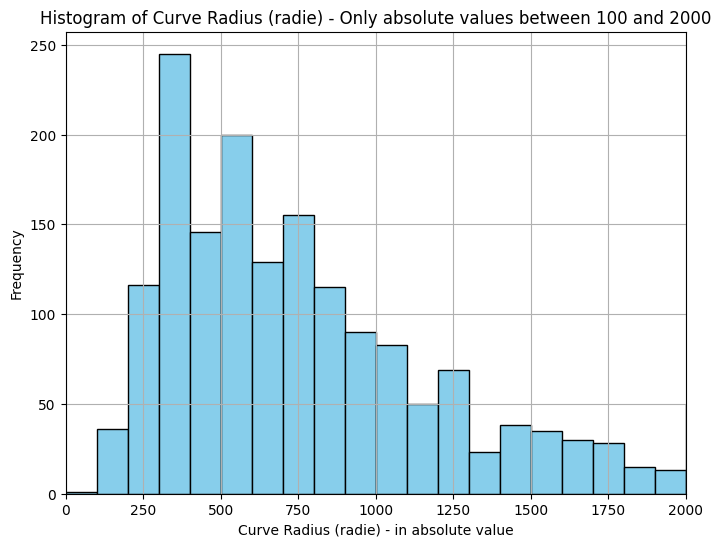

In [68]:
import matplotlib.pyplot as plt

# Plot histogram for 'radie'
plt.figure(figsize=(8, 6))
plt.hist(abs(final_df['radie']), bins=1000, color='skyblue', edgecolor='black')
plt.title('Histogram of Curve Radius (radie) - Only absolute values between 100 and 2000')
plt.xlabel('Curve Radius (radie) - in absolute value')
plt.ylabel('Frequency')
plt.xlim(00, 2000)  # Set the x-axis limits
plt.grid(True)
plt.show()

Histogram of the curve radius with different traffic loads.

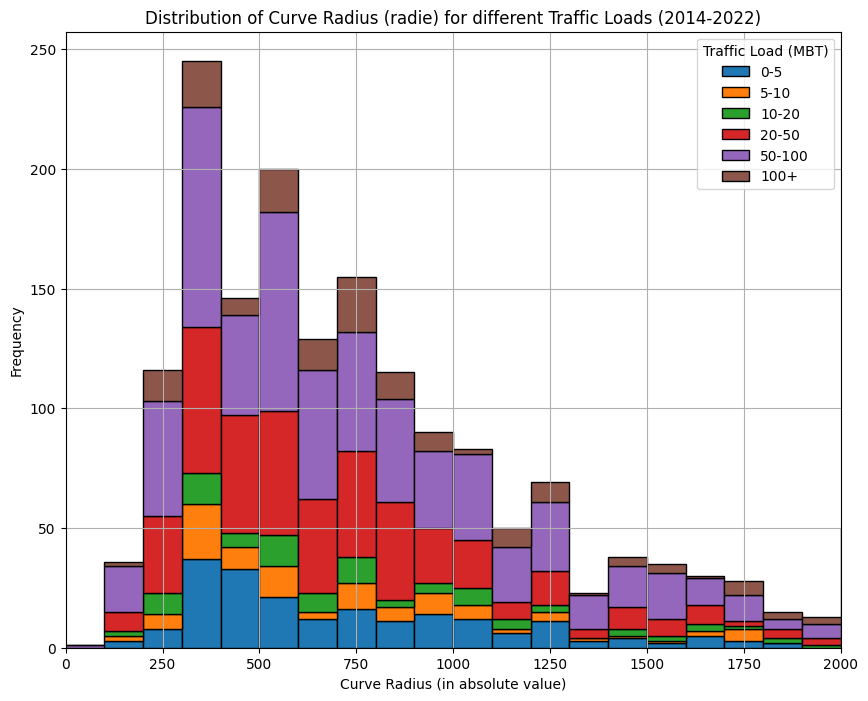

In [74]:
# Define traffic bins for the histogram of 'radie'
traffic_bins = [0, 5, 10, 20, 50, 100, np.inf]  # Adjust bins based on your data distribution
traffic_labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100+']

# Create a new column categorizing traffic into bins
final_df['traffic_interval'] = pd.cut(final_df['trafik 2014-2022'], bins=traffic_bins, labels=traffic_labels, include_lowest=True)

# Prepare the data for stacked bar plot of 'radie'
radie_data = []
for label in traffic_labels:
    subset = final_df[final_df['traffic_interval'] == label]
    radie_data.append(abs(subset['radie'].values))

# Create a stacked bar plot for 'radie' by 'traffic_interval'
plt.figure(figsize=(10, 8))
plt.hist(radie_data, bins=1000, stacked=True, label=traffic_labels, edgecolor='black')
plt.xlim(0, 2000)  # Set the x-axis limits
plt.title('Distribution of Curve Radius (radie) for different Traffic Loads (2014-2022)')
plt.xlabel('Curve Radius (in absolute value)')
plt.ylabel('Frequency')
plt.legend(title='Traffic Load (MBT)')
plt.grid(True)
plt.show()

Now we look at the traffic loads!

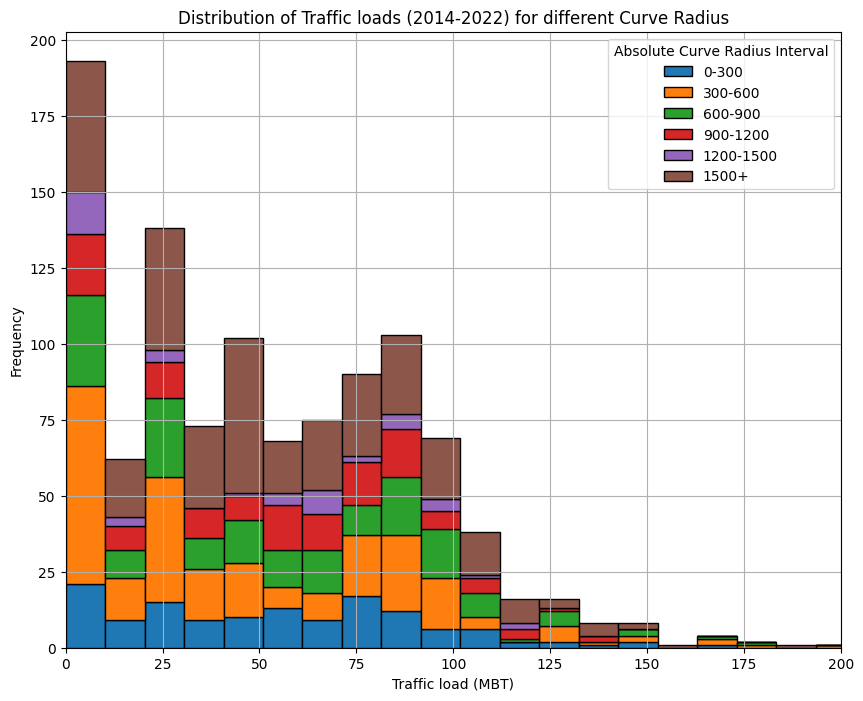

In [73]:
# Define intervals for 'radie'
radie_bins = [0, 300, 600, 900, 1200, 1500, np.inf]
radie_labels = ['0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500+']
final_df['radie_interval'] = pd.cut(final_df['radie'], bins=radie_bins, labels=radie_labels, include_lowest=True)

# Prepare the data for stacked bar plot
traffic_data = []
for label in radie_labels:
    subset = final_df[final_df['radie_interval'] == label]
    traffic_data.append(subset['trafik 2014-2022'].dropna().values)

# Create a stacked bar plot for 'Miljoner bruttotonkilometer 2014' by 'radie_interval'
plt.figure(figsize=(10, 8))
plt.hist(traffic_data, bins=30, stacked=True, label=radie_labels, edgecolor='black')
plt.xlim(0, 200)  # Set the x-axis limits
plt.title('Distribution of Traffic loads (2014-2022) for different Curve Radius')
plt.xlabel('Traffic load (MBT)')
plt.ylabel('Frequency')
plt.legend(title='Absolute Curve Radius Interval')
plt.grid(True)
plt.show()

## Clustering using K-Means algorithm

In [91]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data
final_df['radie_absolute'] = abs(final_df['radie'])

# traffic column
traffic_col = 'Miljoner bruttotonkilometer 2014' #'trafik 2014-2022'
# df_training = final_df[final_df['radie_absolute']<2000][['radie_absolute', 'Spårkategori', ]]
df_training = final_df[final_df['radie_absolute']<2000][['radie_absolute', 'Spårkategori', traffic_col]]



# One-hot encoding for 'Spårkategori' (drop the first category to avoid multicollinearity)
X_encoded = pd.get_dummies(df_training, columns=['Spårkategori'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Perform K-means clustering
n_clusters = 34  # You can adjust this number based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_training['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the results
cluster_summary = df_training.groupby('cluster').agg({
    'radie_absolute': 'mean',
    'Spårkategori': lambda x: x.value_counts().index[0],
    traffic_col: 'mean'
}).sort_values(traffic_col, ascending=False)

print(cluster_summary)

         radie_absolute          Spårkategori  \
cluster                                         
31           746.791667             60E1_P-Ec   
33           578.925172             60E1_P-Ec   
0            863.244472             60E1_P-Fc   
1            712.164359             50E3_P-Ec   
6           1309.183893             60E1_P-Ec   
4            874.232558            50E3_Hambo   
16           575.676149              50E3_Hey   
10           843.439347             60E1_P-FE   
2            684.878686             50E3_P-Fc   
5            695.222923  SJ<41 Skarvspår_Spik   
9            612.939828    50E3 Skarvspår_Hey   
8            676.293421   50E3 Skarvspår_Spik   
15           621.034694   SJ43 Skarvspår_Spik   
17           946.000000             50E3_P-FE   
7            629.806452             50E3_Spik   
19           528.000000             60E1_Spik   
11           577.779000               --_P-Ec   
3            492.239130    SJ43 Skarvspår_Hey   
18           663.285

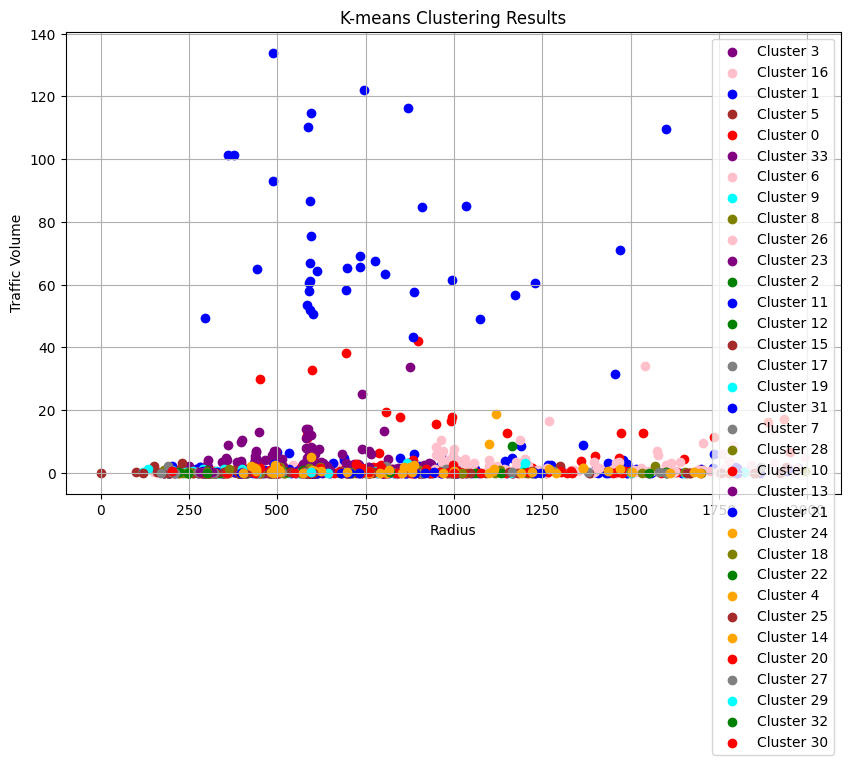

In [92]:
import matplotlib.pyplot as plt

# Define a color map for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster in df_training['cluster'].unique():
    cluster_data = df_training[df_training['cluster'] == cluster]
    plt.scatter(cluster_data['radie_absolute'], cluster_data[traffic_col], 
                color=colors[cluster % len(colors)], label=f'Cluster {cluster}')

plt.xlabel('Radius')
plt.ylabel('Traffic Volume')
plt.title('K-means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()